<a href="https://colab.research.google.com/github/dharmesh-data/capstone_h0tel_booking/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
hotel_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/hotel booking/Copy of Hotel Bookings.csv')

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.shape

(119390, 32)

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
hotel_df['children'] =  hotel_df['children'].fillna(0)


In [ ]:
hotel_df['country'] = hotel_df['country'].fillna(hotel_df['country'].mode().index[0])


In [ ]:
hotel_df['agent']= hotel_df['agent'].fillna('0')


In [ ]:
hotel_df=hotel_df.drop(['company'], axis =1)

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
corr=hotel_df.corr()

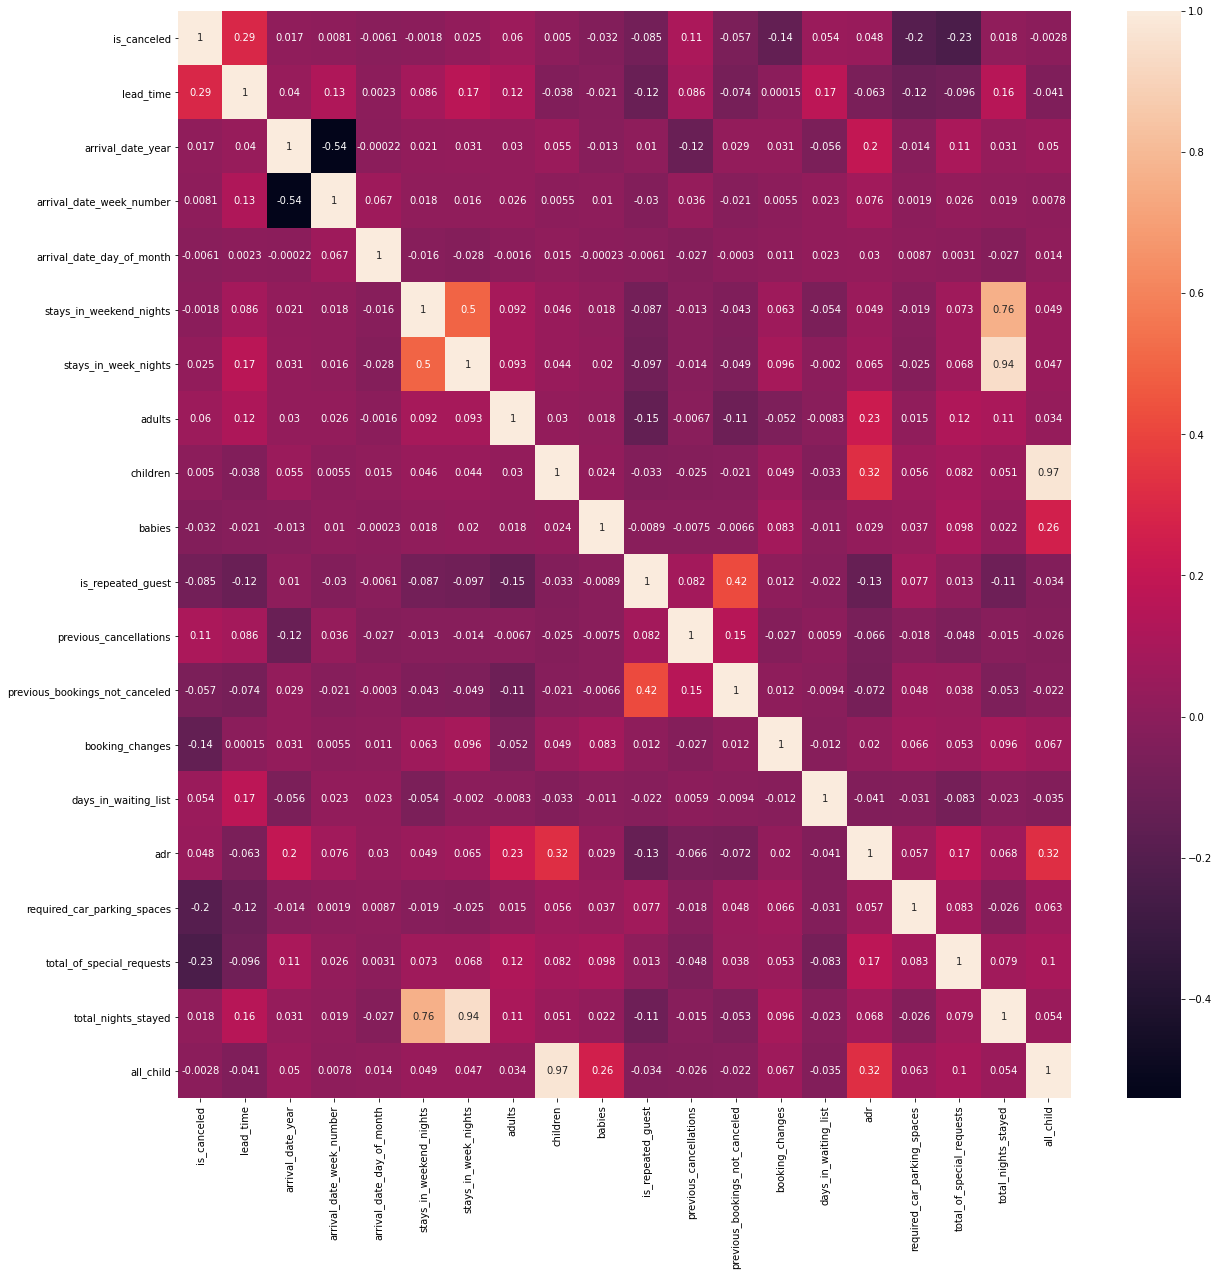

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

Text(0, 0.5, 'Count')

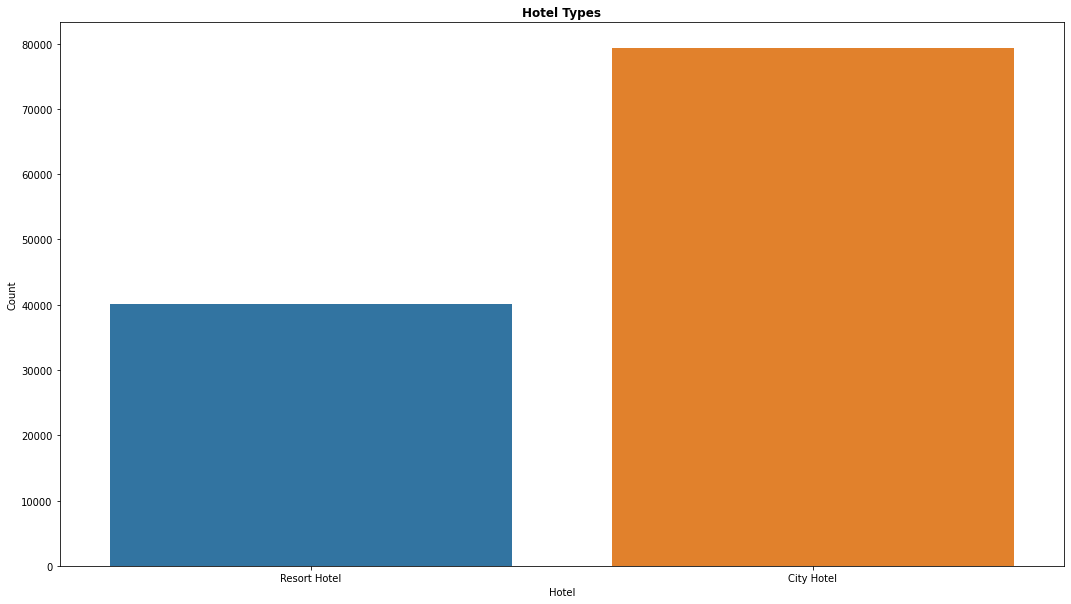

In [ ]:
#finding hotel types and plotting it
plt.figure(figsize=(18,10))
sns.countplot(x='hotel', data = hotel_df)
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=10)
plt.ylabel('Count', fontsize=10)

##approximately 34% of the data was booked for resort hotel and the rest of was booked for City Hotel.



([<matplotlib.patches.Wedge at 0x7f6a61126650>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(0.9564161333812984, 0.5433858480011848, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.52168152729889, 0.29639228072791896, '33.6%')])

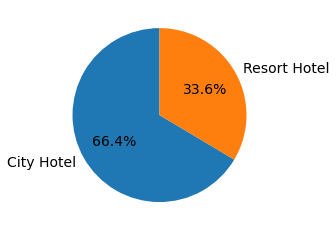

In [ ]:
labels = hotel_df['hotel'].value_counts().index.tolist()
sizes = hotel_df['hotel'].value_counts().tolist()
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

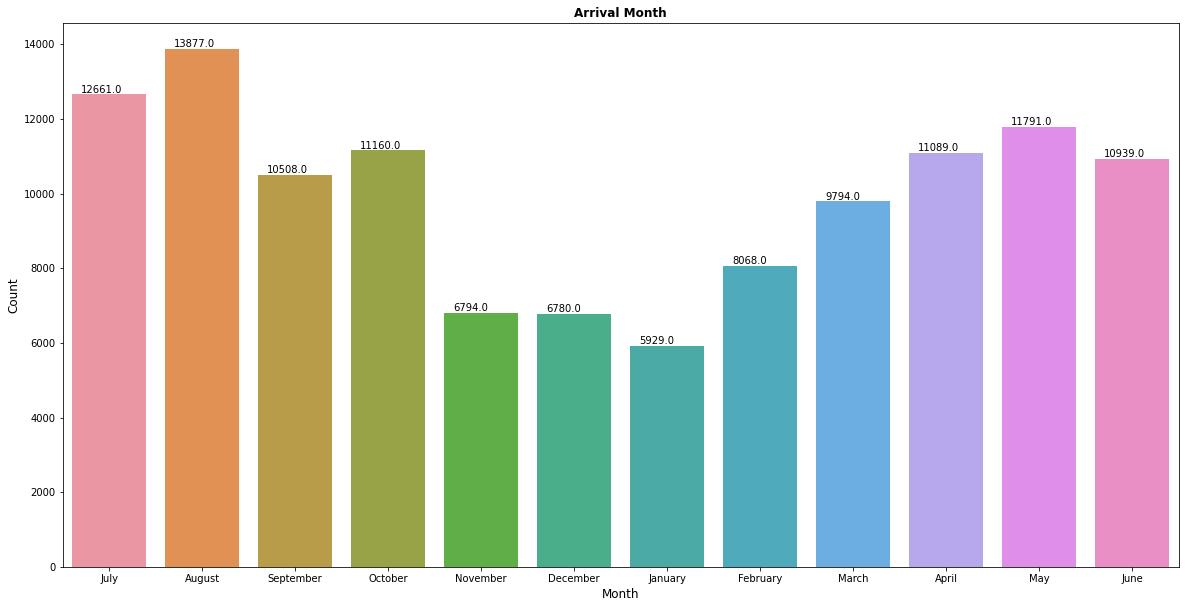

In [ ]:
plt.figure(figsize=(20,10))
arrival_month_graph=sns.countplot(x='arrival_date_month', data = hotel_df)
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in arrival_month_graph.patches:
        arrival_month_graph.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

##August is the busiest month and January is the most unoccupied month

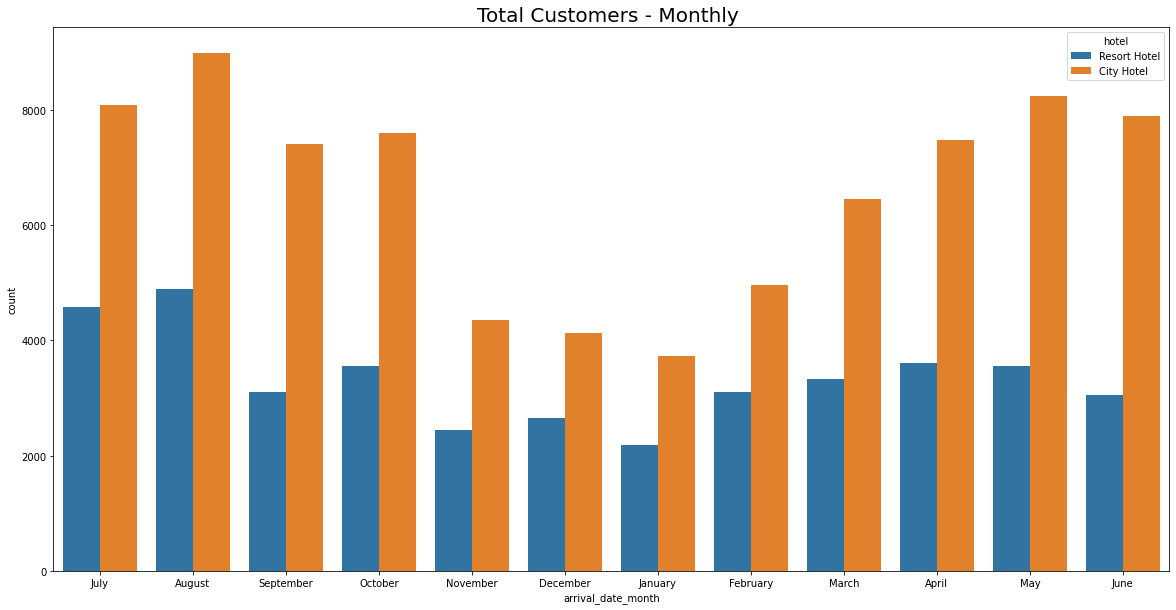

In [ ]:
plt.figure(figsize =(20,10))
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data =hotel_df)

Text(0, 0.5, 'Cancel or not canceled')

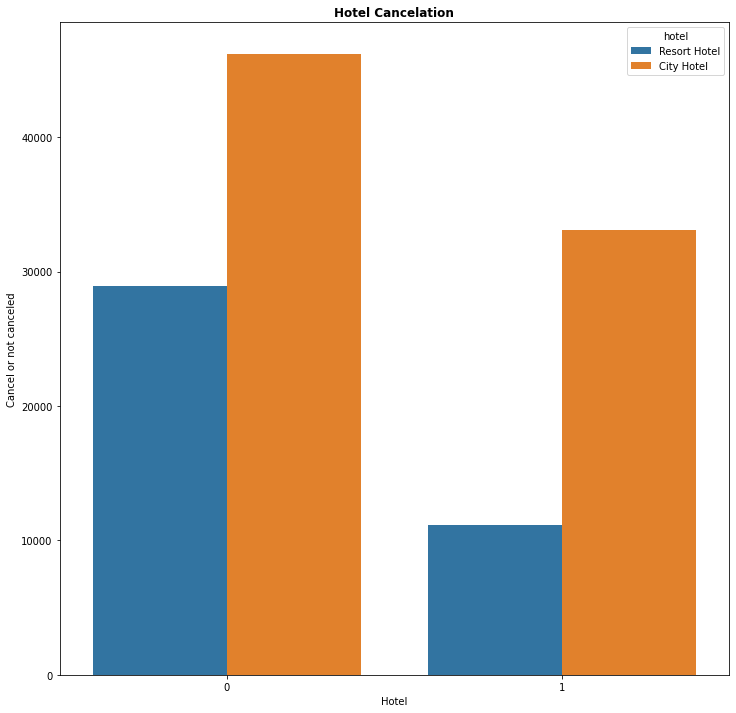

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x='is_canceled',hue='hotel',data = hotel_df)
plt.title('Hotel Cancelation', weight='bold')
plt.xlabel('Hotel', fontsize=10)
plt.ylabel('Cancel or not canceled', fontsize=10)

##less number of booking canceled in compare to not canceled booking

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

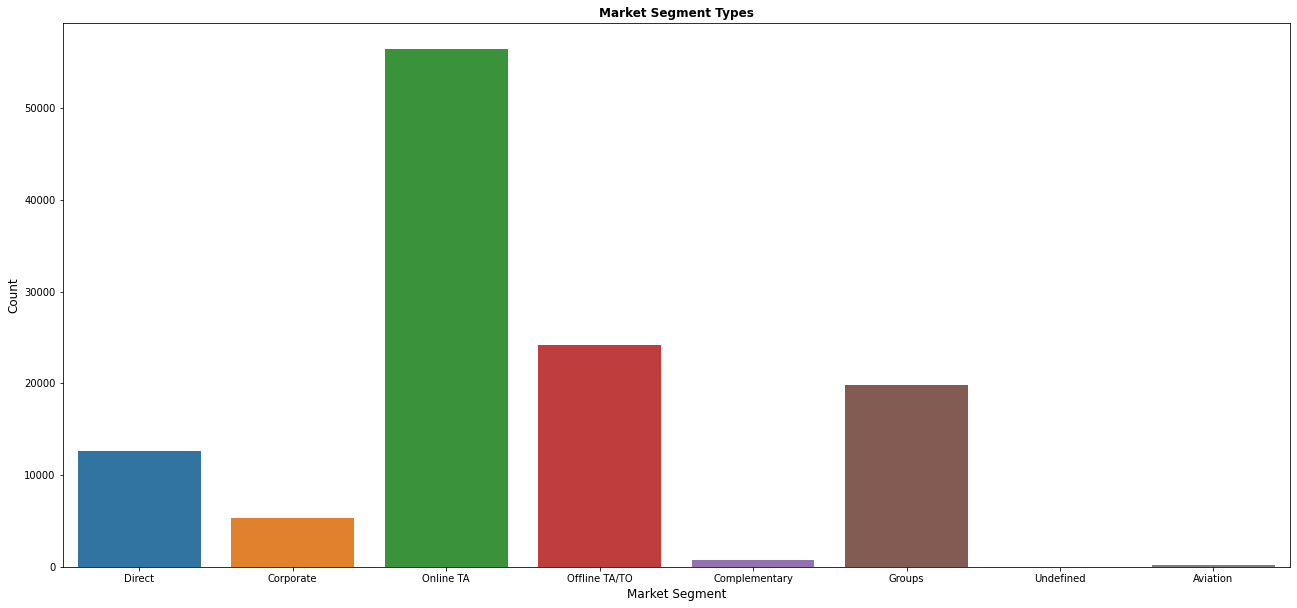

In [ ]:
plt.figure(figsize=(22,10))
sns.countplot(hotel_df['market_segment'])
plt.title('Market Segment Types', weight='bold')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

###The above graphs is summarise these statistics. Most of bookings are made via Online Travel Agents and after that second bookings made via Offline Travel Agents. Less number of bookings made directly without any agents.

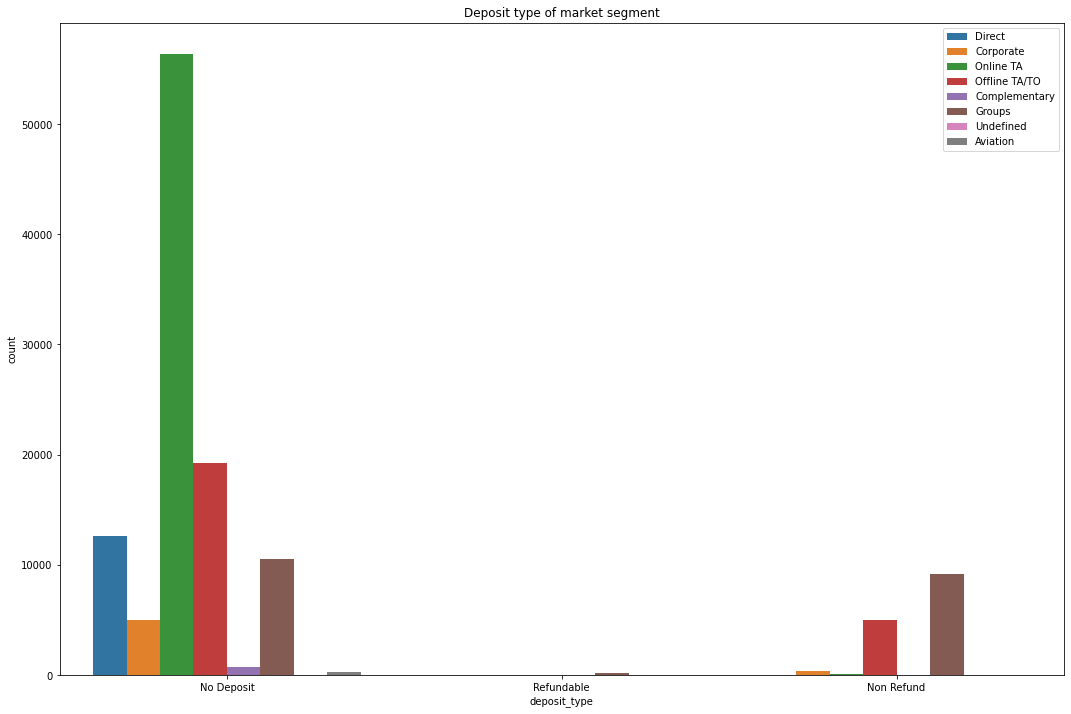

In [ ]:
plt.figure(figsize=(18,12))
sns.countplot(data=hotel_df,x='deposit_type',hue='market_segment')
plt.title('Deposit type of market segment')
plt.legend(loc=1)


The highest book is using Online TA, with No Deposit. While Groups and Offline TA/TO are next with Refundable and Non refund. In this era, it will be easy to book a hotel using Online TA, especially most Online TA offers the customers without deposit facility.
Looking at Offline TA/TO and Groups, the situations where the deposit was received were only in the scenarios where the groups came.

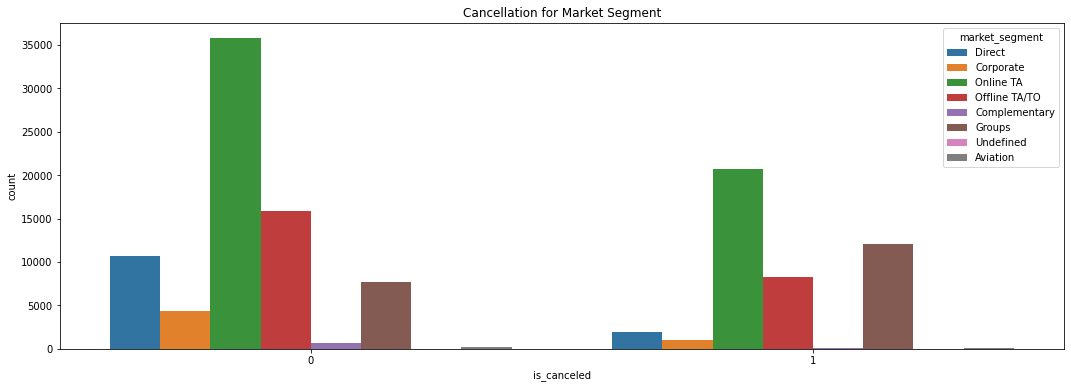

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(data=hotel_df,x='is_canceled',hue='market_segment')
plt.title('Cancellation for Market Segment')
plt.show()

The highest cancellation book is using Online TA. Most of Online TA give a customers previllege to cancel without any charge apply. Second, Groups segment has cancellation rate around 50%.

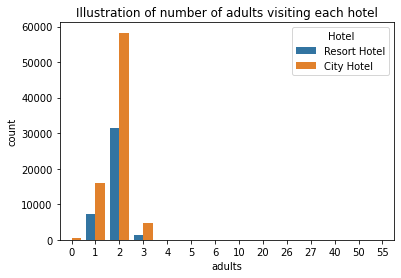

In [ ]:
sns.countplot(data=hotel_df,x='adults',hue='hotel').set_title("Illustration of number of adults visiting each hotel")
plt.legend(loc='upper right', title='Hotel')

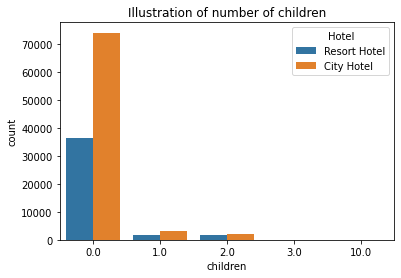

In [ ]:
sns.countplot(data=hotel_df,x='children',hue='hotel').set_title("Illustration of number of children")
plt.legend(loc='upper right', title='Hotel')

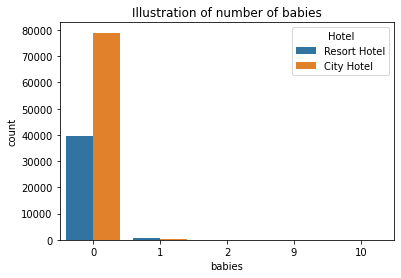

In [ ]:
sns.countplot(data=hotel_df,x='babies',hue='hotel').set_title("Illustration of number of babies")
plt.legend(loc='upper right', title='Hotel')

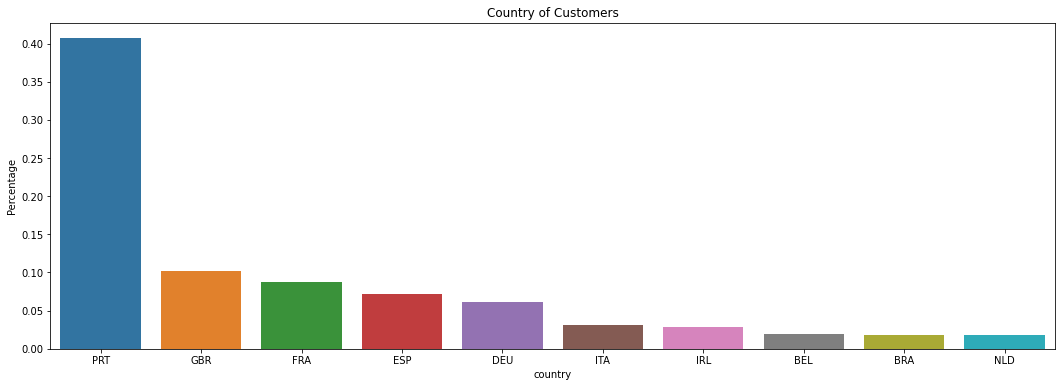

In [ ]:
plt.figure(figsize=(18,6))
country_booking = hotel_df['country'].value_counts(normalize=True).rename_axis('country').reset_index(name='Percentage')
sns.barplot(x='country', y='Percentage', data=country_booking.head(10))
plt.title('Country of Customers')
plt.show()

PRT or Portugal has the most booking demand based on the data (more than 60%). It is pretty obvious because if we trace to the publication page, the description tells us that the data source locations are from hotels located in Portugal.


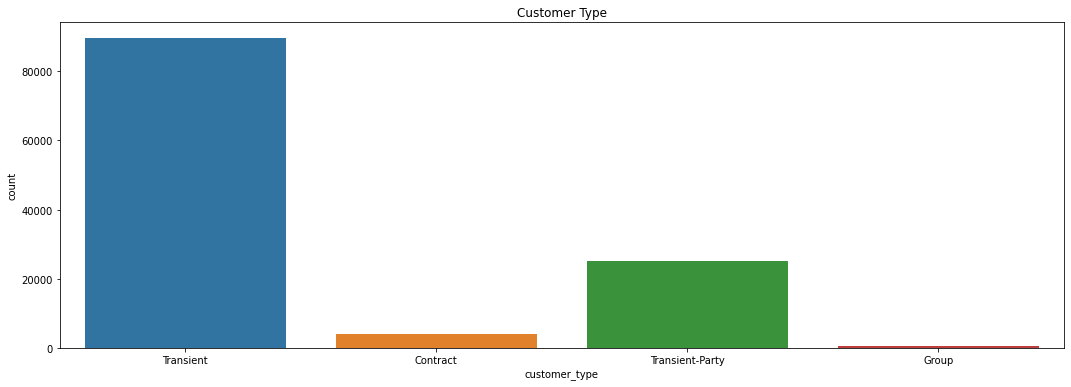

In [ ]:
plt.figure(figsize=(18,6))
countplot(x='customer_type', data= hotel_df)
plt.title('Customer Type')
plt.show()



From the graph:

Transient-first
Transient-party-second
Contract-third
Group-fourth
Most of customers is Transient, means they are walk-in guests, last-minute or bookers, or simply people that require a very short-term stay in your facility. Transient customers are one of the major market segments consist of individuals or groups.

Text(0, 0.5, 'Count')

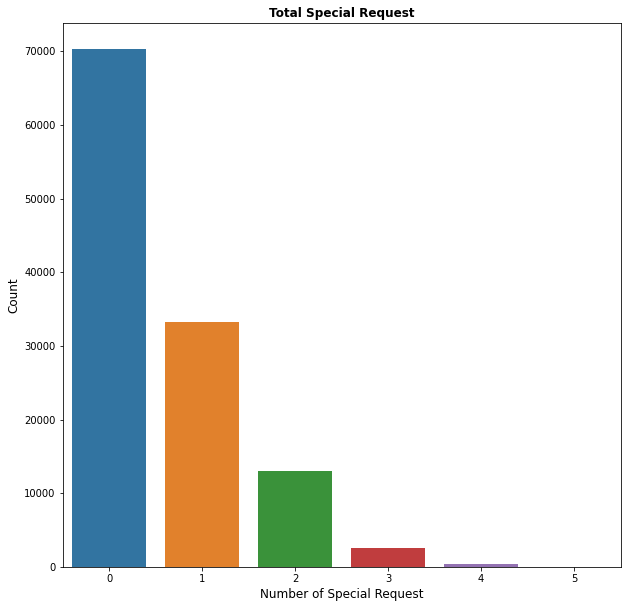

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='total_of_special_requests', data=hotel_df)
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.ylabel('Count', fontsize=12)

Number of special requests made by the customer (e.g. twin bed or high floor)
Most customers don't make any special requests. It has a correlation with customer type. They don't ask for any additional requests because they only transient customers.

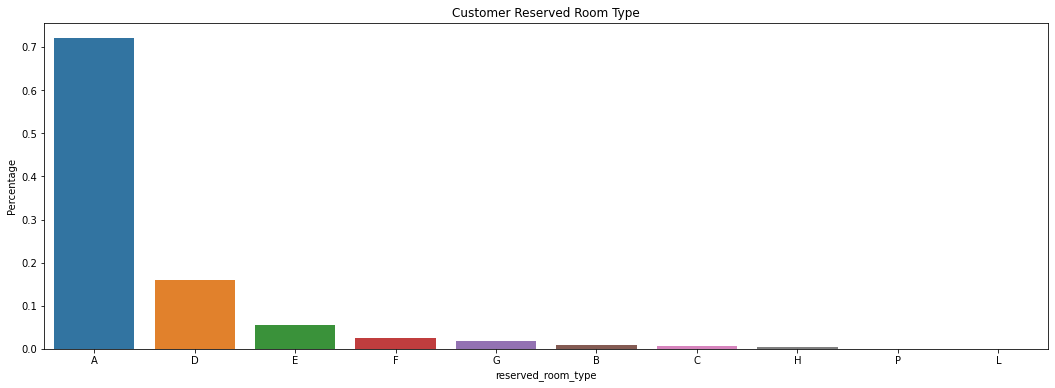

In [ ]:
plt.figure(figsize=(18,6))
room_booking = hotel_df['reserved_room_type'].value_counts(normalize=True).rename_axis('reserved_room_type').reset_index(name='Percentage')
sns.barplot(x='reserved_room_type', y='Percentage', data= room_booking)
plt.title('Customer Reserved Room Type')
plt.show()

In [ ]:
m=pd.DataFrame(hotel_df['meal'].value_counts()/len(hotel_df['meal'])*100)
m


,meal
BB,77.318033
HB,12.114080
SC,8.920345
Undefined,0.979144
FB,0.668398


Text(0, 0.5, 'Total Count')

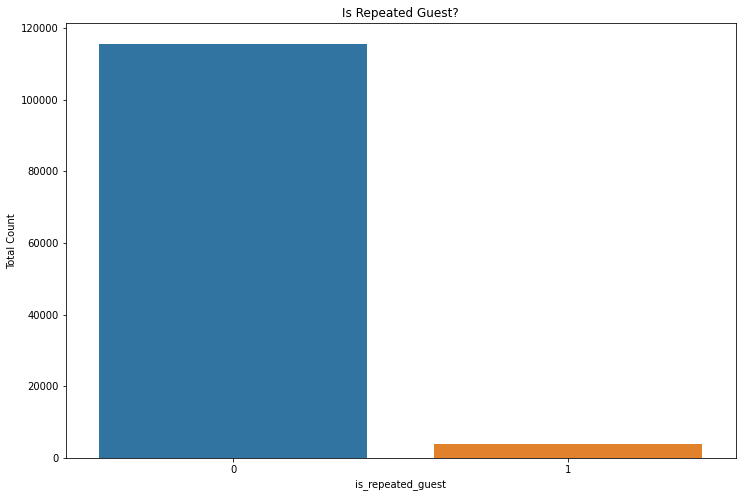

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="is_repeated_guest", data =hotel_df)
plt.title('Is Repeated Guest?')
plt.xlabel('is_repeated_guest')
plt.ylabel('Total Count')

Text(0, 0.5, 'Total Count')

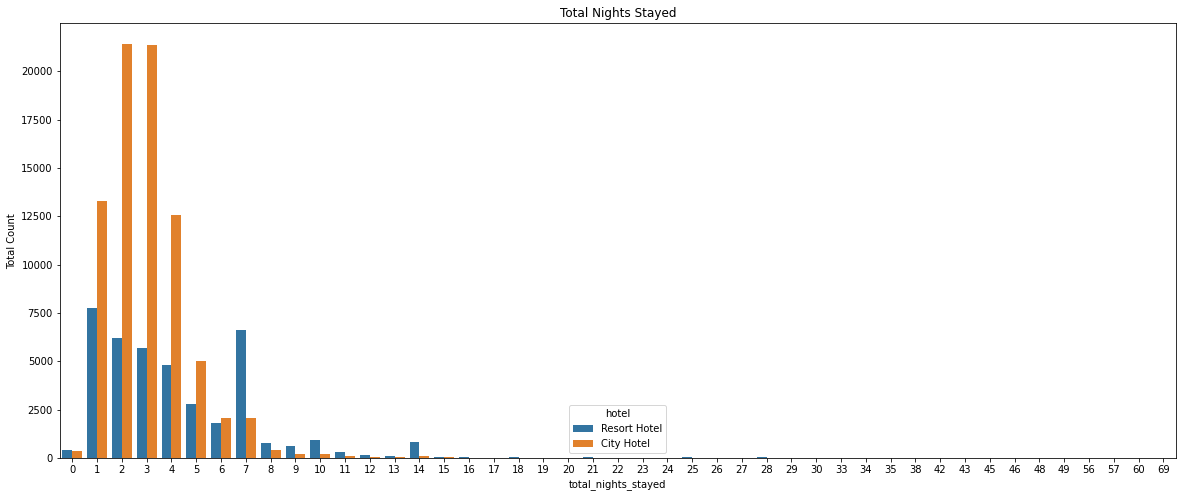

In [ ]:
hotel_df['total_nights_stayed'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']
plt.figure(figsize=(20,8))
ax = sns.countplot(x="total_nights_stayed", hue='hotel',data = hotel_df)
plt.title('Total Nights Stayed')
plt.xlabel('total_nights_stayed')
plt.ylabel('Total Count')

most of the customer on avg stays 1-4 days

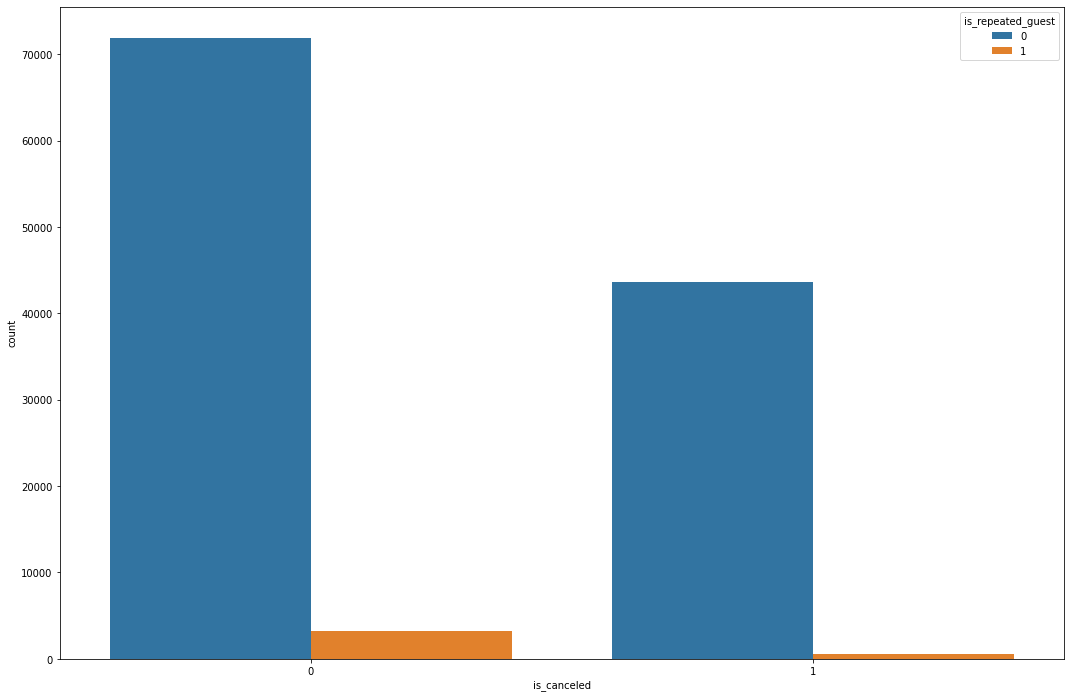

In [ ]:
 plt.figure(figsize=(18,12))
 sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = hotel_df)

here is no surprise that repeated guests do not cancel their reservations. Of course there are some exceptions. Also most of the customers are not repeated guests

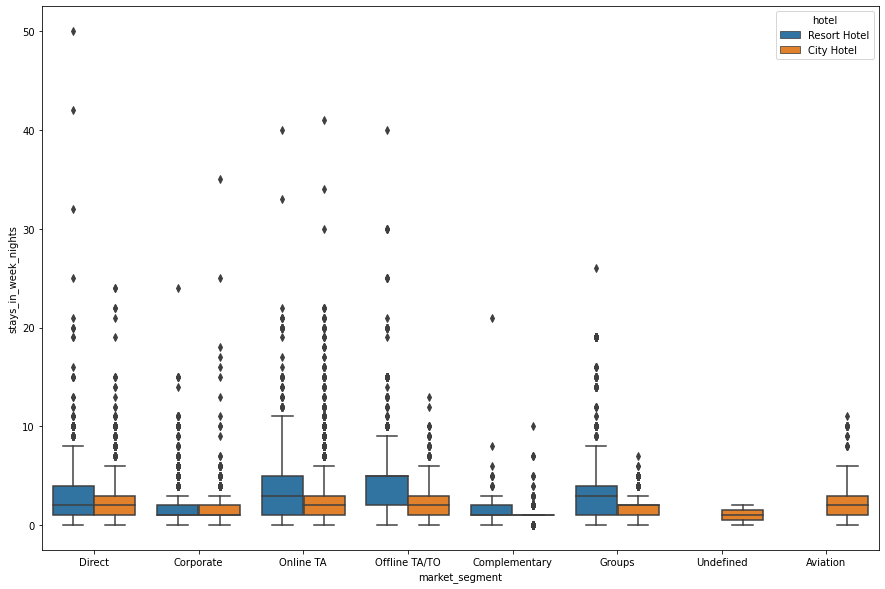

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = hotel_df, hue = "hotel")

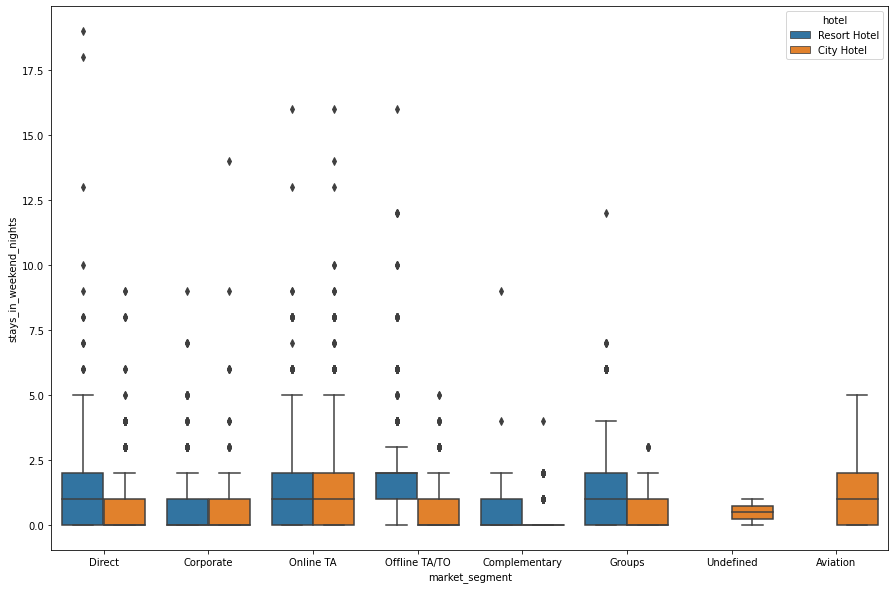

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = hotel_df, hue = "hotel")

most people do not seem to prefer to stay at the hotel for more than 1 week. But it seems normal to stay in resort hotels for up to 12-13 days. 

As it turns out, customers from Aviation Segment do not seem to be staying at the resort hotels. Customers in the Aviation Segment are likely to arrive shortly due to business. Also probably most airports are a bit away from sea and its most likely to be closer to city hotels.

It is obvious that when people go to resort hotels, they prefer to stay more.